<div dir=rtl>
<font color='red' size="6">آماده سازی نوت بوک</font>
<div dir=rtl>

><font size = "4"> 1.  قبل از هر کاری، با استفاده از مسیر نوشته شده در خط پایین، یک کپی از این نوتبوک در گوگل درایو خودتان بسازید و تمرین را در آن نسخه حل کنید.



<div dir=ltr>
<font size = "4" color='blue'>
File --> Save a copy in Drive
</font>
<div dir=rtl>

><font size = "4"> 2.   برای دسترسی به تصاویر مورد نیاز در این تکلیف، بدون اعمال هیچ تغییری در بلوک زیر، آن را اجرا کنید. با این کار فایل های مربوط به تکلیف (تصاویر) دانلود و در فولدر کولب شما قرار داده می شوند. انجام این مرحله پس از هر بار قطع شدن از کولب و اتصال دوباره، ضروری است. یعنی اگر مثلا یک سوال را حل کردید و بعد کولب را بستید یا مدتی با آن کار نکردید و اتصالتان به طور خودکار قطع شد، در اقدام بعدیتان برای نوشتن بقیه‌ی تمرین، حتما این بلوک باید دوباره اجرا شود.

In [26]:
#@title RUN THIS BLOCK WITHOUT ANY CHANGE to download the data
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ywJuPPm-NWkSfHMvB6xN7Y08S7H3L7Vl' -O 'DIP_HW3_data.zip'
!unzip DIP_HW3_data.zip

--2023-12-22 08:30:10--  https://drive.google.com/uc?export=download&id=1ywJuPPm-NWkSfHMvB6xN7Y08S7H3L7Vl
Resolving drive.google.com (drive.google.com)... 172.253.122.139, 172.253.122.113, 172.253.122.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.122.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ko3f7ic4pnvlth40penacjpajhhngm1p/1703233800000/14300142125693899780/*/1ywJuPPm-NWkSfHMvB6xN7Y08S7H3L7Vl?e=download&uuid=5e7ce432-b25f-4379-b28a-24d103771908 [following]
--2023-12-22 08:30:10--  https://doc-00-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ko3f7ic4pnvlth40penacjpajhhngm1p/1703233800000/14300142125693899780/*/1ywJuPPm-NWkSfHMvB6xN7Y08S7H3L7Vl?e=download&uuid=5e7ce432-b25f-4379-b28a-24d103771908
Resolving doc-00-1g-docs.googleusercontent.com (doc-00-1g-docs.googleusercontent.com)... 142.251.163.132, 

# Imports
<div dir=rtl>
<font color="blue" size="6">فراخوانی کتابخانه ها</font>
<div dir=rtl>




In [27]:
###
import cv2
import matplotlib.pyplot as plt
import numpy as np

# ENTER YOUR CODE HERE.

###

# Any Helper Functions

<div dir=rtl>
<font color="blue" size = "4">در صورت نیاز یا برای راحتی خودتان می‌توانید توابع کمکی‌ (مثلا برای عملیات‌های پر تکرار) این جا تعریف کنید (همه در همین بلوک).</font>
</div>



In [28]:
###

###

# Question 3: Image Restoration (35%)

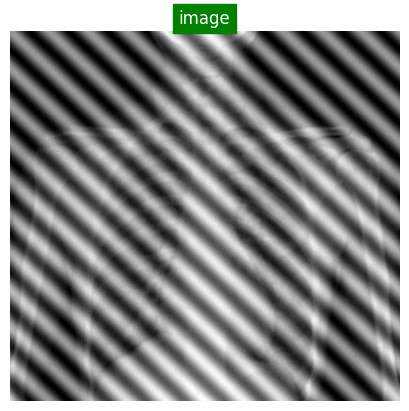

In [29]:
#@title Q3 - Part 1 (5%)
###

# ENTER YOUR CODE HERE.
chest = cv2.imread("chest_xray.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(chest, cmap='gray', vmin=0, vmax=255)
plt.title('image', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
###

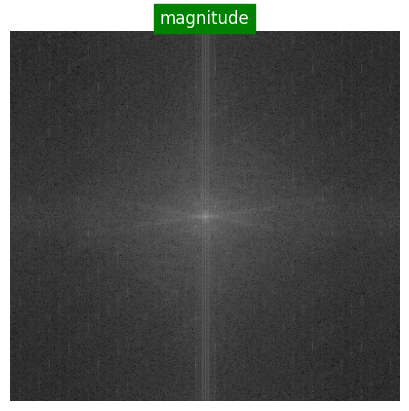

In [31]:
#@title Q3 - Part 2 (10%)
###
fourier = cv2.dft(np.float32(chest), flags=cv2.DFT_COMPLEX_OUTPUT)
fourier_shift = np.fft.fftshift(fourier)
magnitude = cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1])

plt.imshow(10*np.log(magnitude), cmap="gray", vmin=0, vmax=255)
plt.title('magnitude', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()

# ENTER YOUR CODE HERE.

###

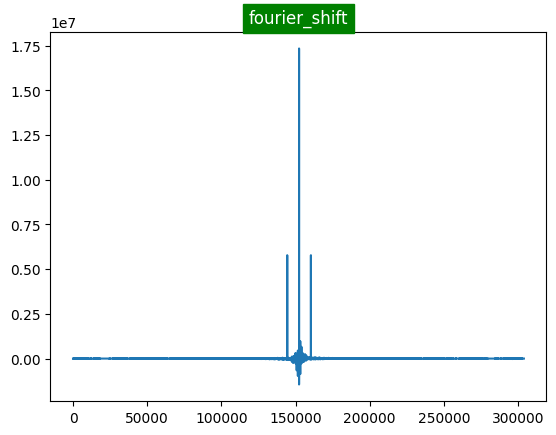

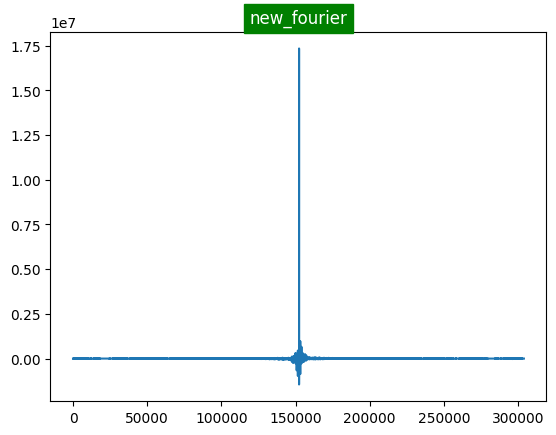

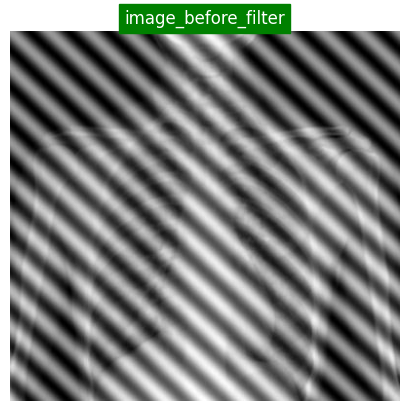

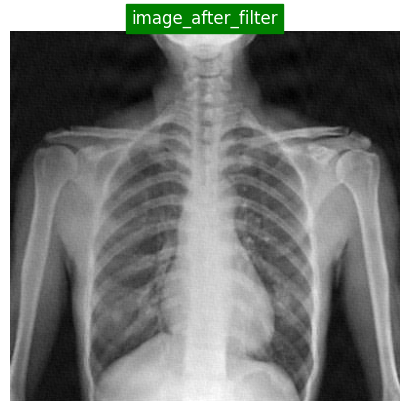

In [32]:
#@title Q3 - Part 3 (30%)
plt.plot(fourier_shift.flatten())
plt.title('fourier_shift', color='white', backgroundcolor='green')
plt.axis('on')
#72-72.5     80-80.5
plt.show()


new_fourier = (fourier_shift.flatten() * (np.concatenate((np.ones(144000), np.zeros(500), np.ones(15500), np.zeros(500) ,np.ones(fourier_shift.flatten().shape[0] - 160500))))).reshape(fourier_shift.shape)
plt.plot(new_fourier.flatten())
plt.title('new_fourier', color='white', backgroundcolor='green')
plt.axis('on')
plt.show()

filterd_fourier_shift = np.fft.ifftshift(new_fourier)
image_after_filter = cv2.idft(filterd_fourier_shift)
image_after_filter = cv2.magnitude(image_after_filter[:,:,0], image_after_filter[:,:,1])
image_after_filter=(image_after_filter - np.min(image_after_filter))/(np.max(image_after_filter) - np.min(image_after_filter)) *256

plt.imshow(chest, cmap="gray", vmin=0, vmax=255)
plt.title('image_before_filter', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
plt.imshow(image_after_filter, cmap="gray", vmin=0, vmax=255)
plt.title('image_after_filter', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
# NO CODE REQUIRED FOR THIS PART.

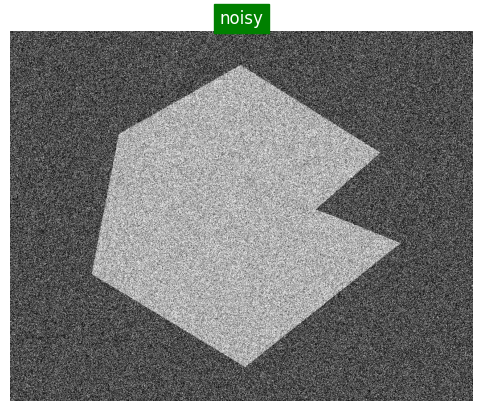

In [33]:
#@title Q3 - Part 4 (5%)
###
noisy = cv2.imread("noisy.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(noisy, cmap="gray", vmin=0, vmax=255)
plt.title('noisy', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()

###

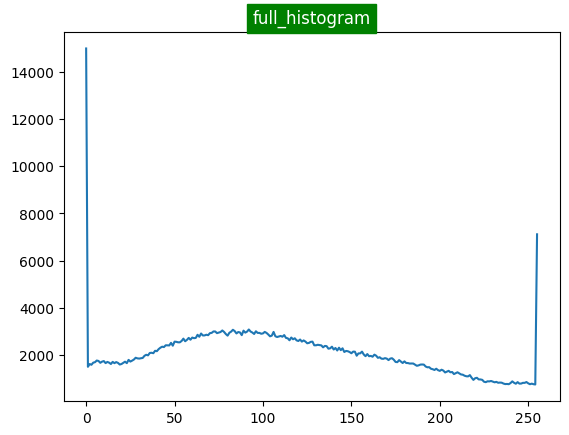

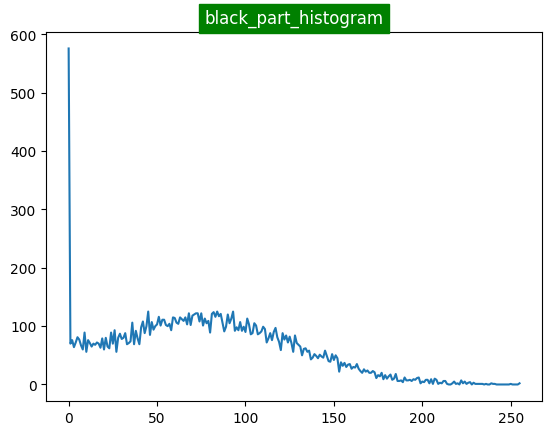

In [34]:
#@title Q3 - Part 5 (15%)

array = np.zeros(256)
for i in range(noisy.shape[0]):
  for j in range(noisy.shape[1]):
    array[noisy[i,j]] += 1

plt.plot(array)
plt.title('full_histogram', color='white', backgroundcolor='green')
plt.show()

array2 = np.zeros(256)
for i in range(noisy.shape[0]//6):
  for j in range(noisy.shape[1]//6):
    array2[noisy[i,j]] += 1

plt.plot(array2)
plt.title('black_part_histogram', color='white', backgroundcolor='green')
plt.show()
# ENTER YOUR CODE HERE.
#Rayleigh noise
###

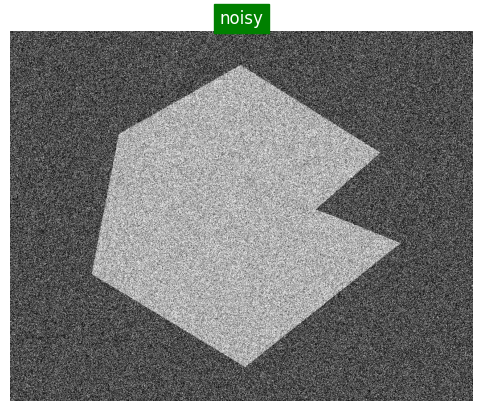

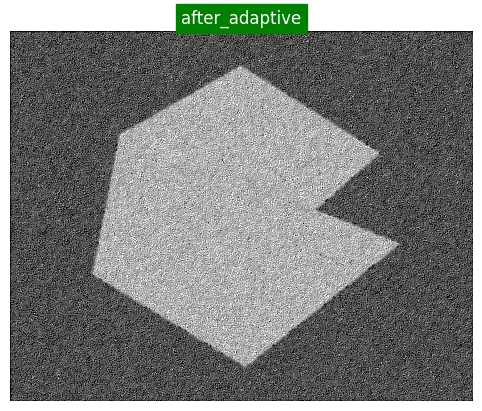

In [35]:
#@title Q3 - Part 6 (15%)
###
var = 5500
h,w = noisy.shape
res = np.zeros((h,w))
image = np.pad(noisy, 2, mode='constant', constant_values=0)
for i in range(h):
  for j in range(w):
    local_m = np.mean(image[i:i+4, j:j+4])
    local_v = np.var(image[i:i+4, j:j+4])
    if local_v < var:
      res[i,j] = image[i+2,j+2] - (var / local_v) * (image[i+2,j+2] - local_m)
plt.imshow(noisy, cmap="gray", vmin=0, vmax=255)
plt.title('noisy', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
plt.imshow(res, cmap="gray", vmin=0, vmax=255)
plt.title('after_adaptive', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()

###

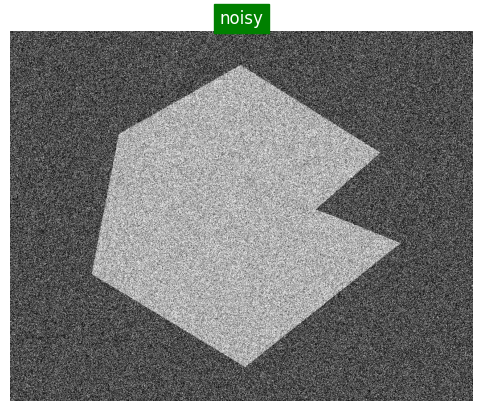

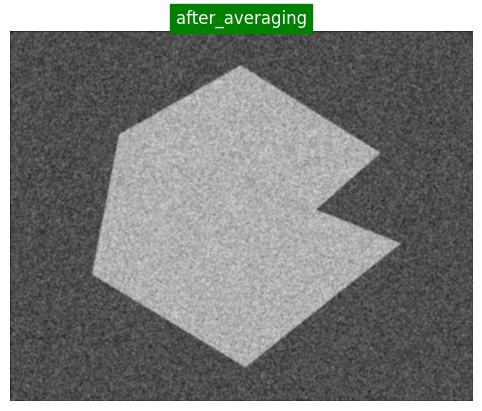

In [36]:
#@title Q3 - Part 7 (10%)
###

h,w = noisy.shape
res = np.zeros((h,w))
image = np.pad(noisy, 2, mode='constant', constant_values=0)
for i in range(h):
  for j in range(w):
    res[i,j] = np.mean(image[i:i+4, j:j+4])
plt.imshow(noisy, cmap="gray", vmin=0, vmax=255)
plt.title('noisy', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
plt.imshow(res, cmap="gray", vmin=0, vmax=255)
plt.title('after_averaging', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
###

<div dir=rtl><font color='green' size="5">جواب سوال ۳-۸</font>
<div>

<div dir=rtl><font size="4">
در فیلتر تطبیقی ساختار تصویر مشخصتر میماند ولی در میانگین گیری لبه های شکل کمی پخش میشوند در حالی که در تطبیقی اینگونه نیست.
 </font><br />
</div>

# Question 4: Morphology (35%)

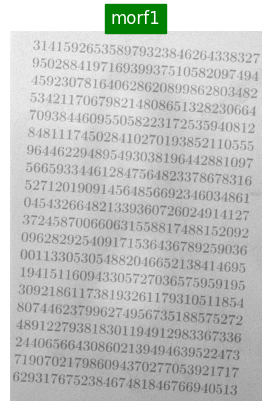

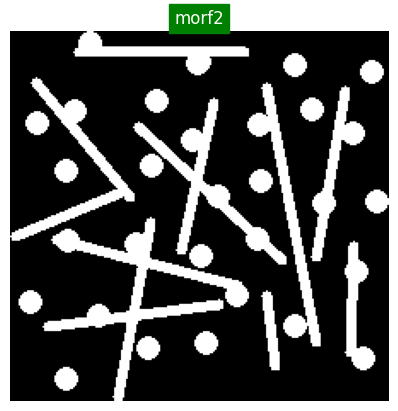

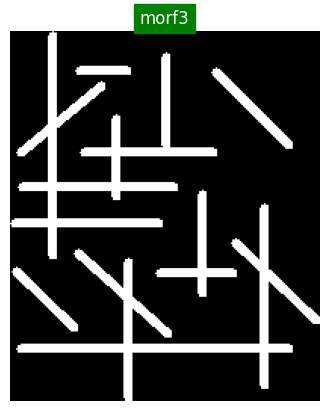

In [37]:
#@title Q4 - Part 1 (5%)
###

morf1 = cv2.imread("morf1.png", cv2.IMREAD_GRAYSCALE)
morf2 = cv2.imread("morf2.png", cv2.IMREAD_GRAYSCALE)
morf3 = cv2.imread("morf3.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(morf1, cmap="gray", vmin=0, vmax=255)
plt.title('morf1', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
plt.imshow(morf2, cmap="gray", vmin=0, vmax=255)
plt.title('morf2', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
plt.imshow(morf3, cmap="gray", vmin=0, vmax=255)
plt.title('morf3', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
###

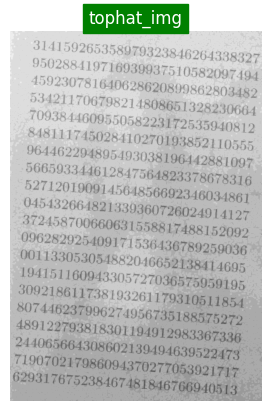

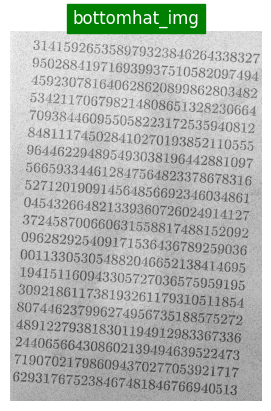

In [38]:
#@title Q4 - Part 2 (35%)
###
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,
                                   filterSize)
tophat_img = morf1 - cv2.morphologyEx(morf1,  cv2.MORPH_OPEN, kernel)
bottomhat_img = cv2.morphologyEx(morf1,  cv2.MORPH_CLOSE, kernel) - morf1
plt.imshow(morf1 - tophat_img, cmap="gray", vmin=0, vmax=255)
plt.title('tophat_img', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
plt.imshow(morf1 - bottomhat_img, cmap="gray", vmin=0, vmax=255)
plt.title('bottomhat_img', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
###

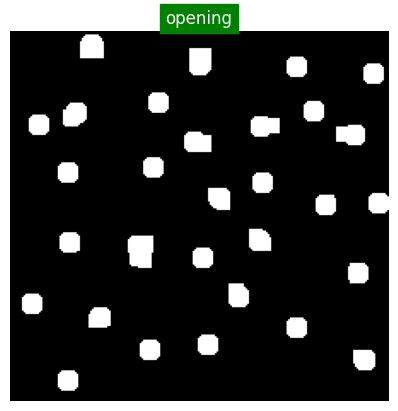

In [39]:
#@title Q4 - Part 3 (20%)
###
kernel = np.ones((8,8),np.uint8)
opening = cv2.morphologyEx(morf2, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap="gray", vmin=0, vmax=255)
plt.title('opening', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
# ENTER YOUR CODE HERE.

###

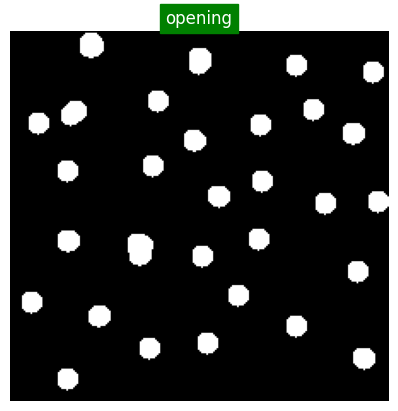

In [40]:
#@title Q4 - Part 4 (10%)
###
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(12,12))
opening = cv2.morphologyEx(morf2, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap="gray", vmin=0, vmax=255)
plt.title('opening', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
# ENTER YOUR CODE HERE.

###

<div dir=rtl><font color='green' size="5">## توضیحات سوال ۴-۴</font>
<div>

<div dir=rtl><font size="4">
همانطور که مشاهده میشود خطوط روی بعضی از دایره ها تاثیر گذلشته اند. برای حل آن مبتوان از نوع دیگری از کرنل استفاده کرد که به دایره نزدیکتر است مانند  eclipse
</div>

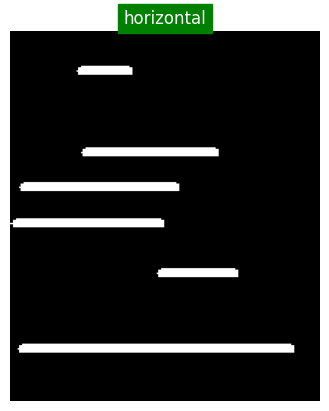

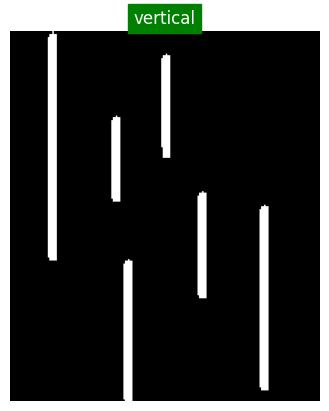

In [41]:
#@title Q4 - Part 5 (20%)
###
kernel = np.ones((1,20),np.uint8)
horizontal = cv2.morphologyEx(morf3, cv2.MORPH_OPEN, kernel)
plt.imshow(horizontal, cmap="gray", vmin=0, vmax=255)
plt.title('horizontal', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
kernel = np.ones((10,1),np.uint8)
vertical = cv2.morphologyEx(morf3, cv2.MORPH_OPEN, kernel)
plt.imshow(vertical, cmap="gray", vmin=0, vmax=255)
plt.title('vertical', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()

# ENTER YOUR CODE HERE.

###

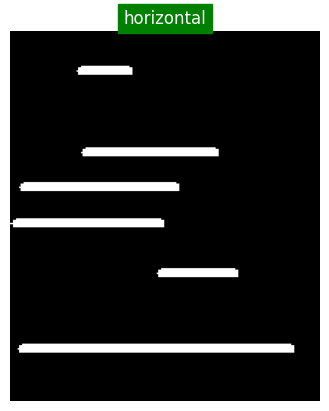

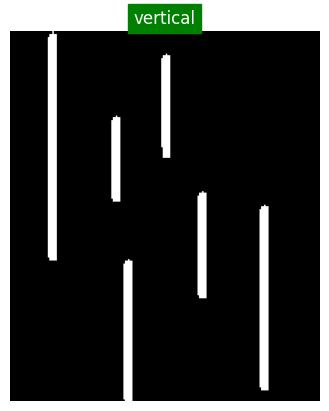

In [42]:
#@title Q4 - Part 6 (10%)
###
kernel = np.ones((1,20),np.uint8)
horizontal = cv2.morphologyEx(morf3, cv2.MORPH_OPEN, kernel)
plt.imshow(horizontal, cmap="gray", vmin=0, vmax=255)
plt.title('horizontal', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
kernel = np.ones((10,1),np.uint8)
vertical = cv2.morphologyEx(morf3, cv2.MORPH_OPEN, kernel)
plt.imshow(vertical, cmap="gray", vmin=0, vmax=255)
plt.title('vertical', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
# ENTER YOUR CODE HERE.

###

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال  ۴-۶</font>
<div>
<font size="4">
مشکلی در نقاط برخورد خطوط مشاهده نمیشود.
 </font><br />
</div>

<div dir=rtl>
<font color='yellow' size = "7">	ملاحظات
</font>

</div>
<div dir=rtl>
<font size = "4">	** توجه داشتید باشید کولب خود را بصورت viewer به اشتراک بگذارید. (بالا سمت راست دکمه Share قرار دارد که موقع فشردن آن یک صفحه باز می‌شود و گزینه‌ای که بصورت پیشفرض نوشته restricted را تغییر دهید)
</font>
</div>

<div dir=rtl>
<font size = "4">	**	لطفاً بعد از تحویل تمرین دیگر کد گوگل کولب خود را باز نکنید و حتی کوچکترین تغییری (حتی در حد ایجاد یک space) در آن ندهید.(چرا که تاریخ آخرین ویرایش آن تغییر کرده و برای مصحح محترم قابل احراز نیست که این کد شما چه زمانی نوشته شده است (از نظر موعد قابل پذیرش برای تحویل) و بخش کدنویسی آن تمرین از شما پذیرفته نخواهد شد)

</font>
</div>

<div dir=rtl>
<font size = "4"> **	نحوه ارسال تمارین: PDF حل تمارین تشریحی به همراه کدهای نوشته شده (اشتراک لینک گوگل کولب شما (داخل Notepad و ابتدای گزارش تشریحی) + تحویل pdf پرینت آن + دانلود .ipynb آن) در قالب یک فایل فشرده zip به اسم HW0_Num باشند که Num شماره دانشجویی شما است مانند HW0_400133001 و فقط از طریق سامانه ی مدیریت یادگیری Courses ارسال بفرمایید. با آرزوی موفقیت برای شما  
</font>
</div>